<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E4%B8%8E%E5%88%9B%E6%96%B0%E5%AE%9E%E8%B7%B5%E3%80%8B/7.2%20%26%26%207.3%20%E9%9D%9E%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%20%E3%80%94%20gekko%20%E5%BA%93%E6%B1%82%E8%A7%A3%20%E8%A6%81%E6%B1%82%E9%83%A8%E5%88%86%E5%8F%82%E6%95%B0%E4%B8%BA%E6%95%B4%E6%95%B0%E7%9A%84%E9%9D%9E%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%20%26%26%20scipy.optimize.minimize%20%E6%B1%82%E8%A7%A3%E9%9D%9E%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%20%E3%80%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[《数学建模与创新实践》_第 12 次开课](https://www.icourse163.org/course/0701XUST003-1206498809?outVendor=zw_mooc_pclszykctj_)

## 7.2

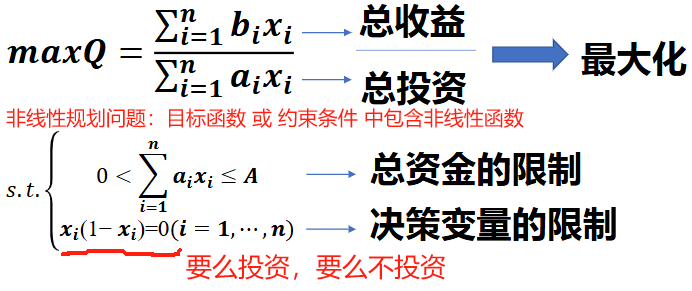

## 7.3 示例： 奶制品的加工计划问题

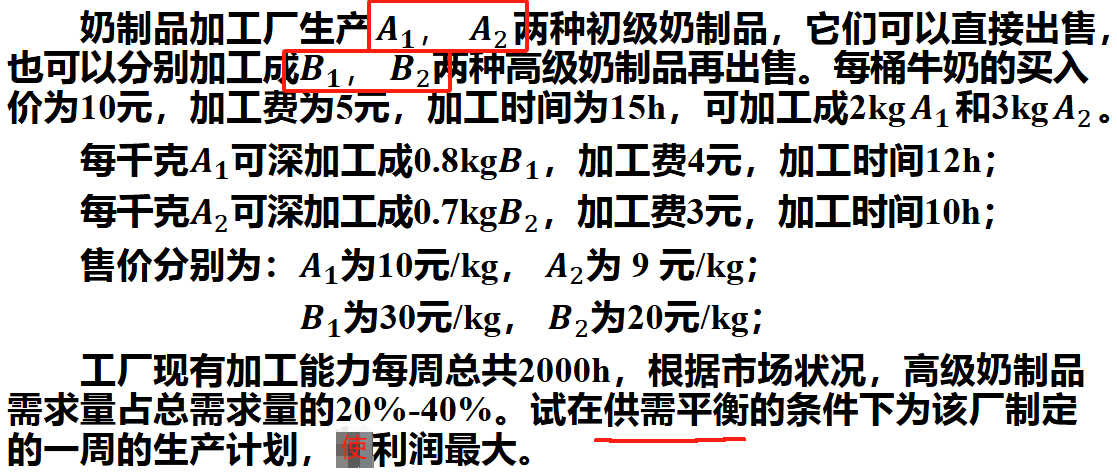

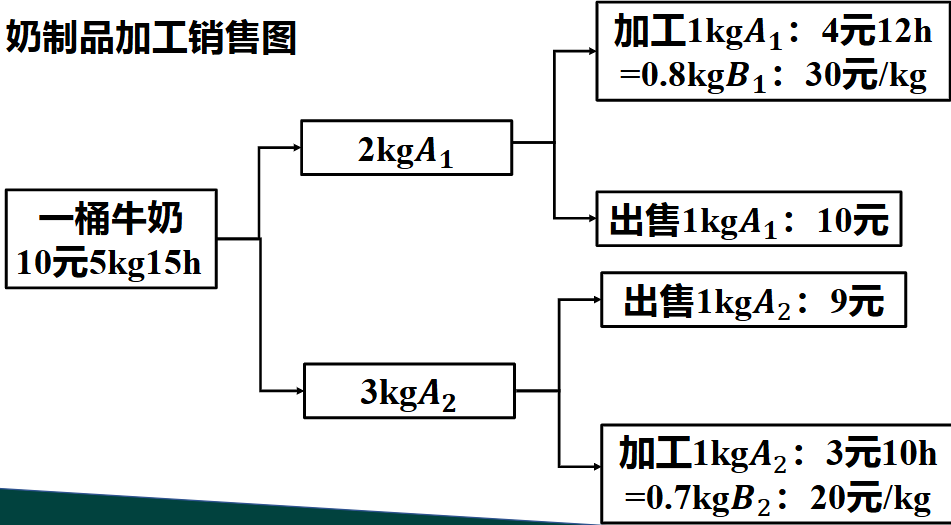

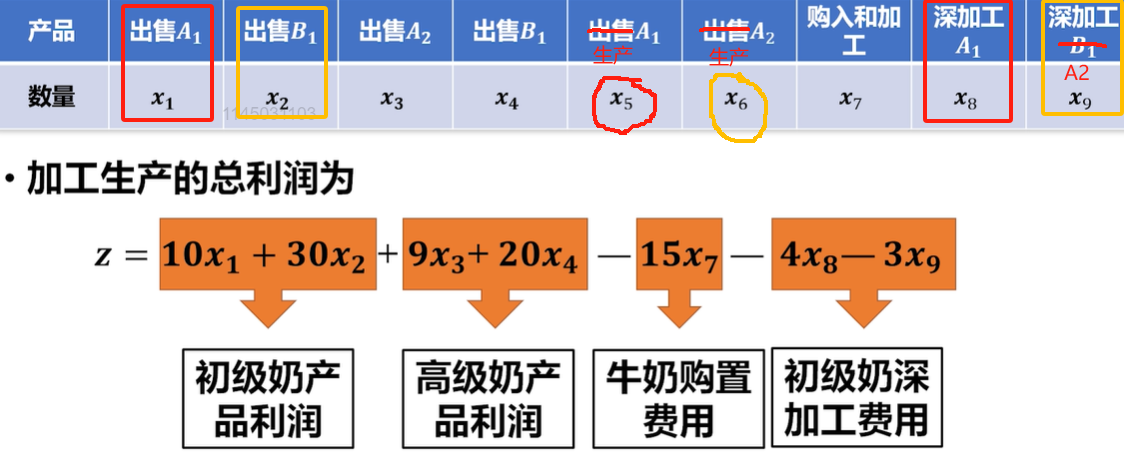

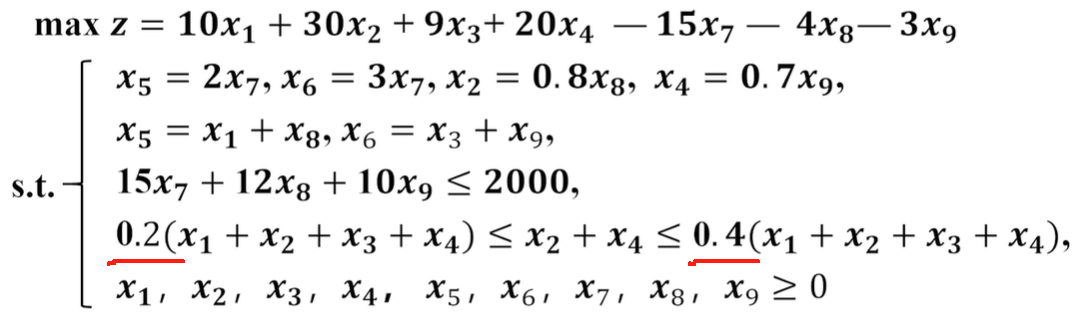

### 方法一：scipy.optimize.minimize 求解非线性规划 〔 要求部分参数为整数时不好处理 〕

In [ ]:
"""
scipy.optimize.minimize 求解非线性规划
"""

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize

from scipy.optimize import minimize

# 目标函数：注意写成最小化形式 ！！！
fun = lambda x: -10 * x[0] - 30 * x[1] - 9 *  x[2] - 20 * x[3] + 15 * x[6] + 4 * x[7] + 3 * x[8]

# 约束 不等式要求是 ≥ 形式
cons = ({'type': 'eq', 'fun': lambda x:  x[4] - 2 * x[6] },
     {'type': 'eq', 'fun': lambda x:  x[5] - 3 * x[6] },
     {'type': 'eq', 'fun': lambda x:  x[1] - 0.8 * x[7] },
     {'type': 'eq', 'fun': lambda x:  x[3] - 0.7 * x[8] },
     {'type': 'eq', 'fun': lambda x:  x[4] - x[0] - x[7] },
     {'type': 'eq', 'fun': lambda x:  x[5] - x[2] - x[8] },
     {'type': 'ineq', 'fun': lambda x:  -15 * x[6] - 12 * x[7] - 10 * x[8] + 2000},
     {'type': 'ineq', 'fun': lambda x: -0.2 * x[0] + 0.8 * x[1] - 0.2 * x[2] + 0.8 * x[3] },
     {'type': 'ineq', 'fun': lambda x: 0.4 * x[0] - 0.6 * x[1] + 0.4 * x[2] - 0.6 * x[3] },)

# 边界
# bnds = ((0, None))
x_0 = (2, 1.6, 3, 2.1, 4, 6, 2, 2, 3)  #  x 的初始猜测值
#    1  2  3  4  5  6 7  8 9
res = minimize(fun, x_0, method='SLSQP', bounds=[(0, None)]*9, constraints=cons)
# (100, 200, 400) 为对 x 的初始猜测

print("目标的最大值：", -res.fun)  #
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最大值： 2998.37398375061
最优解 x = [ 55.28455285  65.04065041 204.87804878   0.         136.58536585
 204.87804878  68.29268293  81.30081301   0.        ]
是否优化成功： Optimization terminated successfully


### 方法二：gekko 求解非线性规划

In [ ]:
!pip install gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 85.1 MB/s eta 0:00:00


In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations 约束
m.Equation( [x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [55.284552846]
出售高级奶制品 B1 的数量 x2: [65.040650407]
直接出售的 初级奶制品 A2 的数量 x3: [204.87804878]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [136.58536585]
生产的 初级奶制品 A2 的数量 x6: [204.87804878]
购入并加工的牛奶桶数 x7: [68.292682927]
加工成 B1 的 A1 数量 x8: [81.300813008]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 2998.3739837


In [ ]:
### 要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 要求 x7 为整数
x7 = m.Var(value=2, lb=0, integer=True)

# Equations 约束
m.Equation( [x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [54.333333333]
出售高级奶制品 B1 的数量 x2: [65.333333333]
直接出售的 初级奶制品 A2 的数量 x3: [204.0]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [136.0]
生产的 初级奶制品 A2 的数量 x6: [204.0]
购入并加工的牛奶桶数 x7: [68.0]
加工成 B1 的 A1 数量 x8: [81.666666667]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 2992.6666667


### —— 革新方案一

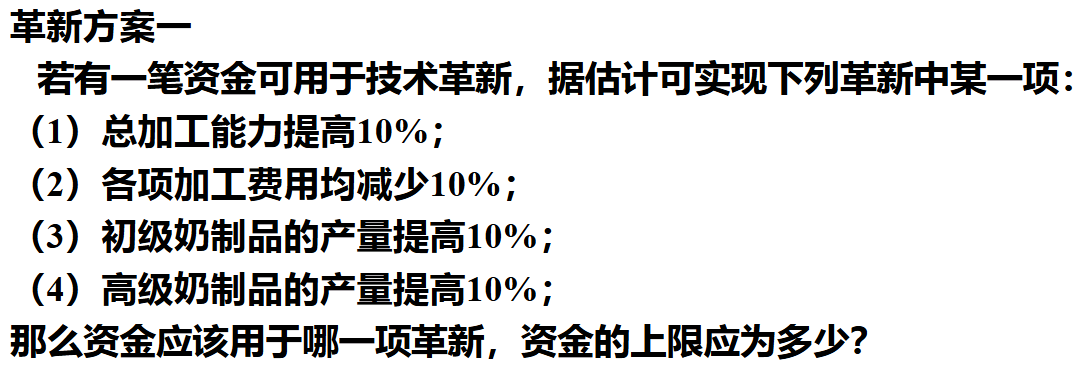

#### (1) 总加工能力提高 10 %，利润为 3298.2 元

In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations 约束
m.Equation( [x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000 * (1 + 0.1),  # 改这里
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [60.81300813]
出售高级奶制品 B1 的数量 x2: [71.544715447]
直接出售的 初级奶制品 A2 的数量 x3: [225.36585366]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [150.24390244]
生产的 初级奶制品 A2 的数量 x6: [225.36585366]
购入并加工的牛奶桶数 x7: [75.12195122]
加工成 B1 的 A1 数量 x8: [89.430894309]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3298.2113821


#### (2) 各项加工费用均减少 10%， 利润为 3065 元

In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations  约束
m.Equation( [x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])
# 目标函数 改这里 加工费 5 4 3
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + (10 + 5 * 0.9) * x7 + 0.9 * 4 * x8 + 0.9 * 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [55.284552846]
出售高级奶制品 B1 的数量 x2: [65.040650407]
直接出售的 初级奶制品 A2 的数量 x3: [204.87804878]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [136.58536585]
生产的 初级奶制品 A2 的数量 x6: [204.87804878]
购入并加工的牛奶桶数 x7: [68.292682927]
加工成 B1 的 A1 数量 x8: [81.300813008]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3065.0406504


#### (3) 初级奶制品的产量提高 10%， 利润为 3242.5 元

In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations 约束  # 初级奶制品 A1  A2 产量 2 3
m.Equation( [x5 == 1.1 * 2 * x7,
        x6 == 1.1 * 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [57.984496124]
出售高级奶制品 B1 的数量 x2: [68.217054264]
直接出售的 初级奶制品 A2 的数量 x3: [214.88372093]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [143.25581395]
生产的 初级奶制品 A2 的数量 x6: [214.88372093]
购入并加工的牛奶桶数 x7: [65.11627907]
加工成 B1 的 A1 数量 x8: [85.271317829]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3242.4806202


#### (4) 高级奶制品的产量提高 10%， 利润为 3233.8 元

In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations 约束 高级奶制品产量 0.8 0.7
m.Equation( [x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 1.1 * 0.8 * x8,
      x4 == 1.1 * 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [63.223787167]
出售高级奶制品 B1 的数量 x2: [68.857589984]
直接出售的 初级奶制品 A2 的数量 x3: [212.20657277]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [141.47104851]
生产的 初级奶制品 A2 的数量 x6: [212.20657277]
购入并加工的牛奶桶数 x7: [70.735524257]
加工成 B1 的 A1 数量 x8: [78.247261346]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3233.8028169


<font size=4><font color=blue>进行革新 (1) 总加工能力提高 10 %</font>，可获得所有革新措施中的最大利润 3298.2113821 元， 比革新前的利润
 2998.3739837 高 299.8373984。

因此<font color=blue>资金上限为  **299.8**373984</font></font>

In [ ]:
print(3298.2113821 - 2998.3739837)

299.8373984


### —— 革新方案 二

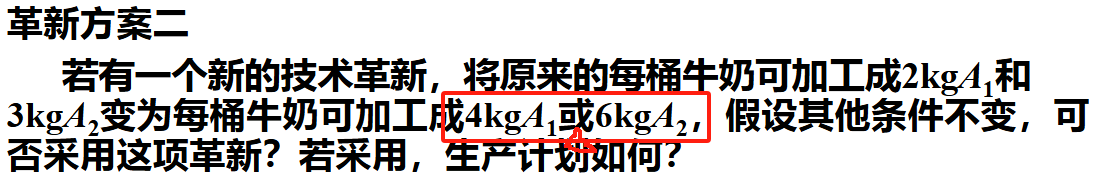

In [ ]:
### 不要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 不要求 x7 为整数
x7 = m.Var(value=2, lb=0)

# Equations 约束  2  3 变 4 6
m.Equation( [ #x5 == 2 * x7,
        #x6 == 3 * x7,
        x5/4 + x6/6 == x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [0.0]
出售高级奶制品 B1 的数量 x2: [67.368421053]
直接出售的 初级奶制品 A2 的数量 x3: [269.47368421]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [84.210526316]
生产的 初级奶制品 A2 的数量 x6: [269.47368421]
购入并加工的牛奶桶数 x7: [65.964912281]
加工成 B1 的 A1 数量 x8: [84.210526316]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3120.0


In [ ]:
### 要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 要求 x7 为整数
x7 = m.Var(value=2, lb=0, integer=True)

# Equations 约束  2  3 变 4 6
m.Equation( [ #x5 == 2 * x7,
        #x6 == 3 * x7,
        x5/4 + x6/6 == x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) <= x2 + x4,
      x2 + x4 <= 0.4 * (x1 + x2 + x3 + x4)])

# 目标函数
m.Obj(-10 * x1 - 30 * x2 - 9 *  x3 - 20 * x4 + 15 * x7 + 4 * x8 + 3 * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [0.0]
出售高级奶制品 B1 的数量 x2: [67.368421053]
直接出售的 初级奶制品 A2 的数量 x3: [269.47368421]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [84.210526316]
生产的 初级奶制品 A2 的数量 x6: [269.47368421]
购入并加工的牛奶桶数 x7: [66.0]
加工成 B1 的 A1 数量 x8: [84.210526316]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3119.4736842


<font size=4>革新方案二可获得最大利润为 **3119**.4736842 元， 比革新前的利润 2998.3739837 **高 121**。

故 <font color=blue>可采用这项革新</font>，生产计划为：

购入 66 桶牛奶，其中 **21 桶**加工成 A1, 并将所有 A1 继续加工成 B1 后销售；另外 **45 桶**加工成 A2 后直接出售。
</font>

In [ ]:
print(3119.4736842 - 2998.3739837)

121.09970050000038


### —— 革新方案 三：  根据市场经济规律 调整 生产计划

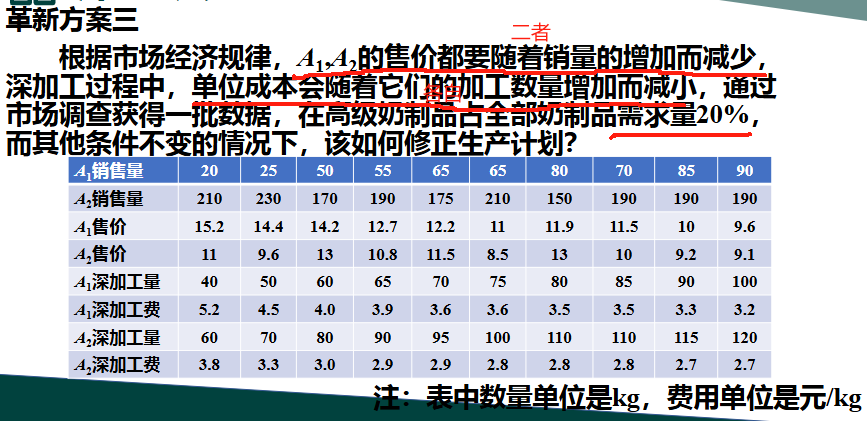

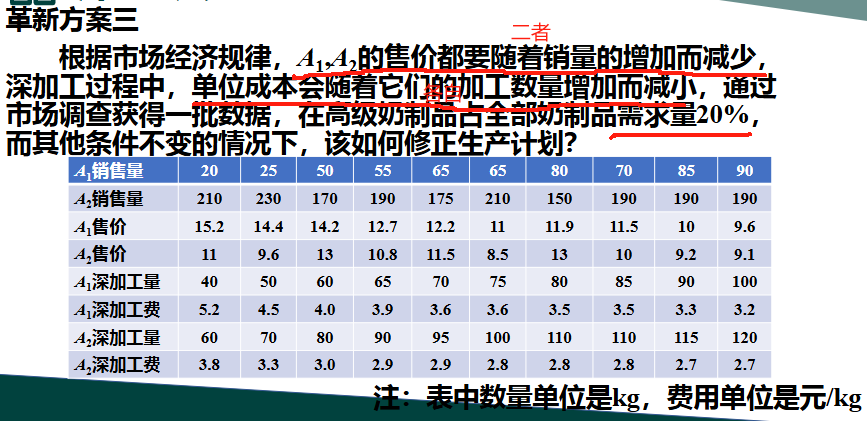

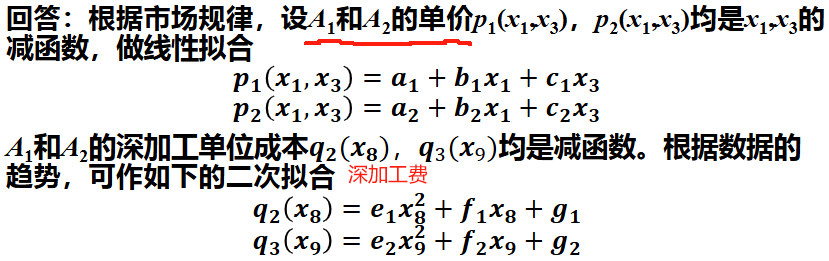

#### 二元一次 函数拟合

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 输入数据需要转换为二维特征矩阵
x1_data = np.array([20, 25, 50, 55, 65, 65, 80, 70, 85, 90])
x2_data = np.array([210, 230, 170, 190, 175, 210, 150, 190, 190, 190])
y_data = np.array([15.2, 14.4, 14.2, 12.7, 12.2, 11, 11.9, 11.5, 10, 9.6])

X = np.column_stack((x1_data, x2_data))  # 形状：(n_samples, 2)
y = y_data  # 形状：(n_samples,)

# 创建并训练模型
model = LinearRegression()
model.fit(X, y)

# 获取系数
a_fit = model.coef_[0]
b_fit = model.coef_[1]
c_fit = model.intercept_

print(f"A1 售价拟合方程: z = {a_fit:.4f}x1 + {b_fit:.4f}x3 + {c_fit:.4f}")
print(f"R²得分: {model.score(X, y):.4f}")

A1 售价拟合方程: z = -0.0937x1 + -0.0356x3 + 24.7299
R²得分: 0.9933


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 输入数据需要转换为二维特征矩阵
x1_data = np.array([20, 25, 50, 55, 65, 65, 80, 70, 85, 90])
x2_data = np.array([210, 230, 170, 190, 175, 210, 150, 190, 190, 190])
y_data = np.array([11, 9.6, 13, 10.8, 11.5, 8.5, 13, 10, 9.2, 9.1])

X = np.column_stack((x1_data, x2_data))  # 形状：(n_samples, 2)
y = y_data  # 形状：(n_samples,)

# 创建并训练模型
model = LinearRegression()
model.fit(X, y)

# 获取系数
a_fit = model.coef_[0]
b_fit = model.coef_[1]
c_fit = model.intercept_

print(f"A2 售价拟合方程: z = {a_fit:.4f}x1 + {b_fit:.4f}x3 + {c_fit:.4f}")
print(f"R²得分: {model.score(X, y):.4f}")

A2 售价拟合方程: z = -0.0563x1 + -0.0839x3 + 29.9575
R²得分: 0.9873


#### 一元二次 函数拟合

Python 根据数据进行函数拟合，示例

In [ ]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2025-04-07 08:38:52--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to www.wfonts.com (www.wfonts.com)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  8.34MB/s    in 1.1s    

2025-04-07 08:38:54 (8.34 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



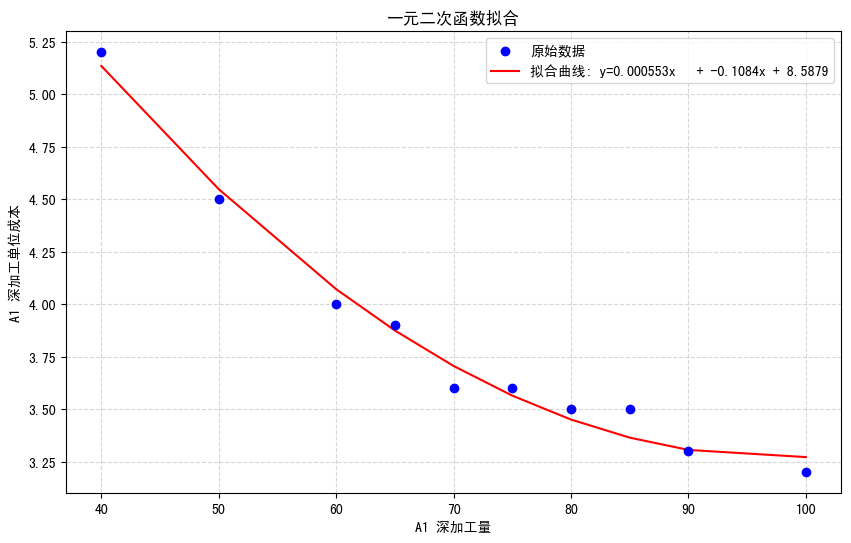

【拟合参数】
二次项系数 a = 0.000553 ± 0.000082
一次项系数 b = -0.1084 ± 0.0116
常数项   c = 8.5879 ± 0.3932

R² = 0.9849


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#curve-fit

# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 第二步：新增字体
import matplotlib
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


import warnings
warnings.filterwarnings("ignore")

# 表格数据
# A1 深加工量
x_data = np.array([40, 50, 60, 65, 70, 75, 80, 85, 90, 100])
# A1 的深加工成本
y_data = np.array([5.2, 4.5, 4.0, 3.9, 3.6, 3.6, 3.5, 3.5, 3.3, 3.2])

# 定义要拟合的一元二次函数模型
def func(x, a, b, c):
  return a * x**2 + b * x + c

# 执行曲线拟合
initial_guess = [1, 1, 1]  # 初始参数猜测
popt, pcov = curve_fit(func, x_data, y_data, p0=initial_guess)
a_fit, b_fit, c_fit = popt
params_error = np.sqrt(np.diag(pcov))  # 计算参数误差

# 计算拟合结果
y_fit = func(x_data, a_fit, b_fit, c_fit)

# ======================
# 可视化结果
# ======================
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='原始数据', zorder=3)
plt.plot(x_data, y_fit, 'r-', label=f'拟合曲线: y={a_fit:.6f}x² + {b_fit:.4f}x + {c_fit:.4f}')
plt.xlabel('A1 深加工量')
plt.ylabel('A1 深加工单位成本')
plt.title('一元二次函数拟合')
plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.show()

# ======================
# 输出拟合结果
# ======================
print("【拟合参数】")
print(f"二次项系数 a = {a_fit:.6f} ± {params_error[0]:.6f}")
print(f"一次项系数 b = {b_fit:.4f} ± {params_error[1]:.4f}")
print(f"常数项   c = {c_fit:.4f} ± {params_error[2]:.4f}")

# 计算R平方值
residuals = y_data - func(x_data, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR² = {r_squared:.4f}")

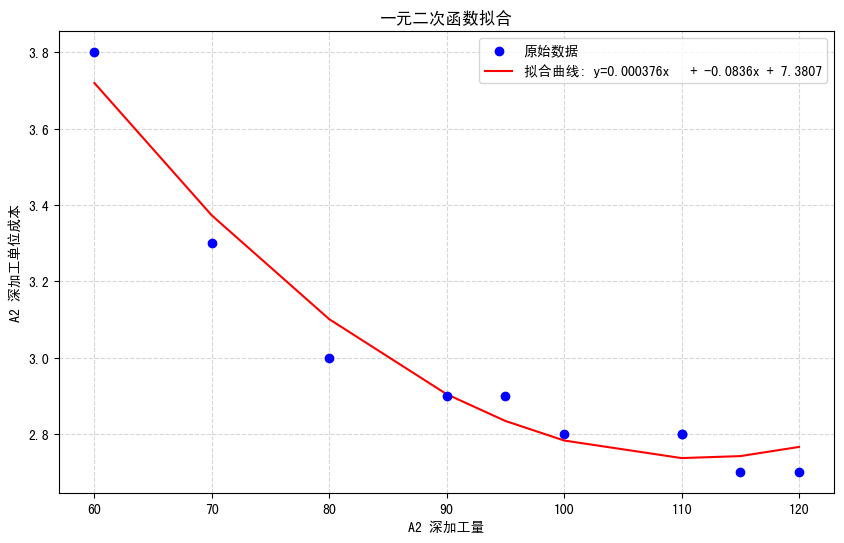

【拟合参数】
二次项系数 a = 0.000376 ± 0.000075
一次项系数 b = -0.0836 ± 0.0137
常数项   c = 7.3807 ± 0.6027

R² = 0.9610


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#curve-fit

# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 第二步：新增字体
import matplotlib
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


import warnings
warnings.filterwarnings("ignore")

# 表格数据
# A2 深加工量
x_data = np.array([60, 70, 80, 90, 95, 100, 110, 110, 115, 120])
# A2 的深加工成本
y_data = np.array([3.8, 3.3, 3.0, 2.9, 2.9, 2.8, 2.8, 2.8, 2.7, 2.7])

# 定义要拟合的一元二次函数模型
def func(x, a, b, c):
  return a * x**2 + b * x + c

# 执行曲线拟合
initial_guess = [1, 1, 1]  # 初始参数猜测
popt, pcov = curve_fit(func, x_data, y_data, p0=initial_guess)
a_fit, b_fit, c_fit = popt
params_error = np.sqrt(np.diag(pcov))  # 计算参数误差

# 计算拟合结果
y_fit = func(x_data, a_fit, b_fit, c_fit)

# ======================
# 可视化结果
# ======================
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='原始数据', zorder=3)
plt.plot(x_data, y_fit, 'r-', label=f'拟合曲线: y={a_fit:.6f}x² + {b_fit:.4f}x + {c_fit:.4f}')
plt.xlabel('A2 深加工量')
plt.ylabel('A2 深加工单位成本')
plt.title('一元二次函数拟合')
plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.show()

# ======================
# 输出拟合结果
# ======================
print("【拟合参数】")
print(f"二次项系数 a = {a_fit:.6f} ± {params_error[0]:.6f}")
print(f"一次项系数 b = {b_fit:.4f} ± {params_error[1]:.4f}")
print(f"常数项   c = {c_fit:.4f} ± {params_error[2]:.4f}")

# 计算R平方值
residuals = y_data - func(x_data, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR² = {r_squared:.4f}")

R² 值越接近 1 表示拟合效果越好。基本接近 1 了。

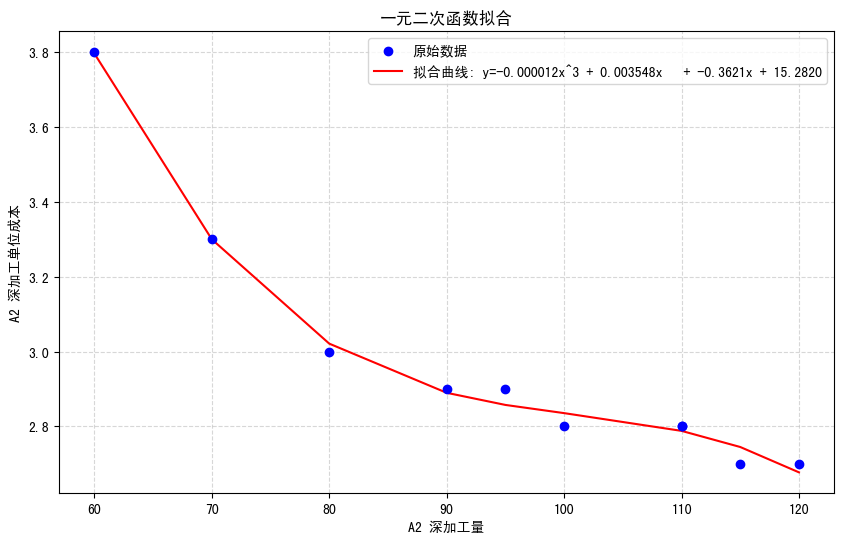

【拟合参数】
三次项系数 d = 0.003548 ± 0.000002
二次项系数 a = 0.003548 ± 0.000564
一次项系数 b = -0.3621 ± 0.0498
常数项   c = 15.2820 ± 1.4272

R² = 0.9938


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#curve-fit

# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 第二步：新增字体
import matplotlib
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


import warnings
warnings.filterwarnings("ignore")

# 表格数据
# A2 深加工量
x_data = np.array([60, 70, 80, 90, 95, 100, 110, 110, 115, 120])
# A2 的深加工成本
y_data = np.array([3.8, 3.3, 3.0, 2.9, 2.9, 2.8, 2.8, 2.8, 2.7, 2.7])

# 定义要拟合的一元二次函数模型
def func(x, d, a, b, c):
  return d * x**3 + a * x**2 + b * x + c

# 执行曲线拟合
initial_guess = [1, 1, 1, 1]  # 初始参数猜测
popt, pcov = curve_fit(func, x_data, y_data, p0=initial_guess)
d_fit, a_fit, b_fit, c_fit = popt
params_error = np.sqrt(np.diag(pcov))  # 计算参数误差

# 计算拟合结果
y_fit = func(x_data, d_fit, a_fit, b_fit, c_fit)

# ======================
# 可视化结果
# ======================
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='原始数据', zorder=3)
plt.plot(x_data, y_fit, 'r-', label=f'拟合曲线: y={d_fit:.6f}x^3 + {a_fit:.6f}x² + {b_fit:.4f}x + {c_fit:.4f}')
plt.xlabel('A2 深加工量')
plt.ylabel('A2 深加工单位成本')
plt.title('一元二次函数拟合')
plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.show()

# ======================
# 输出拟合结果
# ======================
print("【拟合参数】")
print(f"三次项系数 d = {a_fit:.6f} ± {params_error[0]:.6f}")
print(f"二次项系数 a = {a_fit:.6f} ± {params_error[1]:.6f}")
print(f"一次项系数 b = {b_fit:.4f} ± {params_error[2]:.4f}")
print(f"常数项   c = {c_fit:.4f} ± {params_error[3]:.4f}")

# 计算R平方值
residuals = y_data - func(x_data, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR² = {r_squared:.4f}")

R² 值越接近 1 表示拟合效果越好。

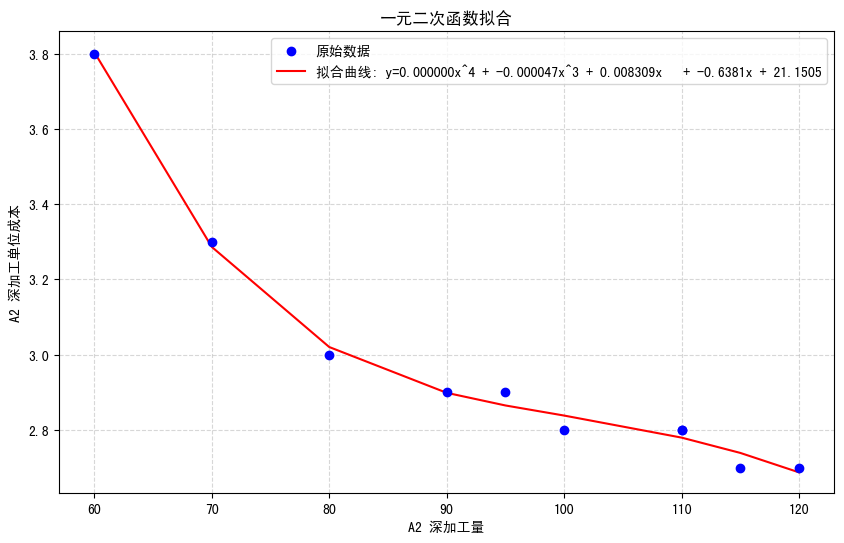

【拟合参数】
三次项系数 e = 0.000000 ± 0.000000
三次项系数 d = 0.008309 ± 0.000047
二次项系数 a = 0.008309 ± 0.006337
一次项系数 b = -0.6381 ± 0.3693
常数项   c = 21.1505 ± 7.9179

R² = 0.9944


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#curve-fit

# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 第二步：新增字体
import matplotlib
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


import warnings
warnings.filterwarnings("ignore")

# 表格数据
# A2 深加工量
x_data = np.array([60, 70, 80, 90, 95, 100, 110, 110, 115, 120])
# A2 的深加工成本
y_data = np.array([3.8, 3.3, 3.0, 2.9, 2.9, 2.8, 2.8, 2.8, 2.7, 2.7])

# 定义要拟合的一元二次函数模型
def func(x, e, d, a, b, c):
  return e * x**4 + d * x**3 + a * x**2 + b * x + c

# 执行曲线拟合
initial_guess = [1, 1, 1, 1, 1]  # 初始参数猜测
popt, pcov = curve_fit(func, x_data, y_data, p0=initial_guess)
e_fit, d_fit, a_fit, b_fit, c_fit = popt
params_error = np.sqrt(np.diag(pcov))  # 计算参数误差

# 计算拟合结果
y_fit = func(x_data, e_fit, d_fit, a_fit, b_fit, c_fit)

# ======================
# 可视化结果
# ======================
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='原始数据', zorder=3)
plt.plot(x_data, y_fit, 'r-', label=f'拟合曲线: y={e_fit:.6f}x^4 + {d_fit:.6f}x^3 + {a_fit:.6f}x² + {b_fit:.4f}x + {c_fit:.4f}')
plt.xlabel('A2 深加工量')
plt.ylabel('A2 深加工单位成本')
plt.title('一元二次函数拟合')
plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.show()

# ======================
# 输出拟合结果
# ======================
print("【拟合参数】")
print(f"三次项系数 e = {e_fit:.6f} ± {params_error[0]:.6f}")
print(f"三次项系数 d = {a_fit:.6f} ± {params_error[1]:.6f}")
print(f"二次项系数 a = {a_fit:.6f} ± {params_error[2]:.6f}")
print(f"一次项系数 b = {b_fit:.4f} ± {params_error[3]:.4f}")
print(f"常数项   c = {c_fit:.4f} ± {params_error[4]:.4f}")

# 计算R平方值
residuals = y_data - func(x_data, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR² = {r_squared:.4f}")

是否需要更高次多项式，需要权衡。

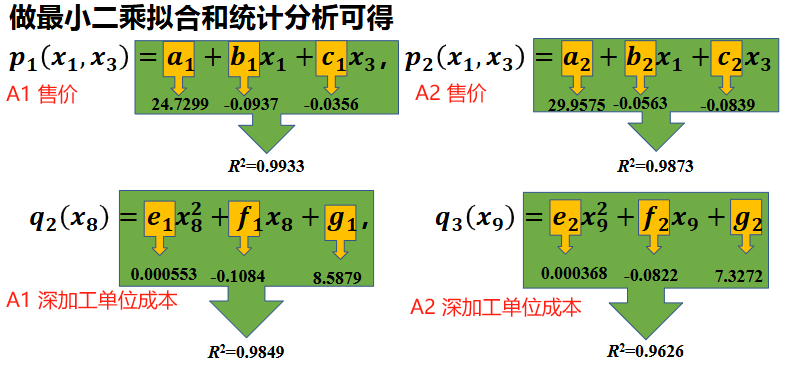

#### 将拟合的函数 代入规划模型

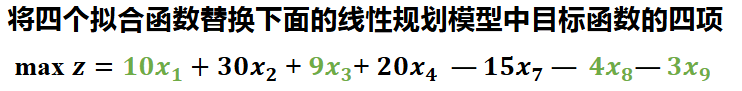

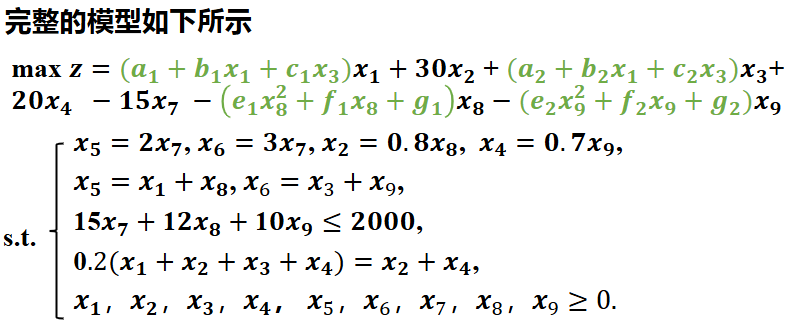

In [ ]:
!pip install gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 28.4 MB/s eta 0:00:00


In [ ]:
### 要求购买的 牛奶桶数 为整数。

# https://gekko.readthedocs.io/en/latest/examples.html

# !pip install gekko

from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
          # minlp iterations with integer solution
          'minlp_max_iter_with_int_sol 10', \
          # treat minlp as nlp
          'minlp_as_nlp 0', \
          # nlp sub-problem max iterations
          'nlp_maximum_iterations 50', \
          # 1 = depth first, 2 = breadth first
          'minlp_branch_method 1', \
          # maximum deviation from whole number
          'minlp_integer_tol 0.05', \
          # covergence tolerance
          'minlp_gap_tol 0.01']

# Initialize variables 初始化参数
x1 = m.Var(value=2, lb=0)
x2 = m.Var(value=1.6, lb=0)
x3 = m.Var(value=3, lb=0)
x4 = m.Var(value=2.1, lb=0)
x5 = m.Var(value=4, lb=0)
x6 = m.Var(value=6, lb=0)
x8 = m.Var(value=2, lb=0)
x9 = m.Var(value=3, lb=0)
# 要求 x7 为整数
x7 = m.Var(value=2, lb=0, integer=True)

# Equations 约束  2  3 变 4 6
m.Equation( [ x5 == 2 * x7,
        x6 == 3 * x7,
       x2 == 0.8 * x8,
      x4 == 0.7 * x9,
      x5 == x1 + x8,
      x6 == x3 + x9,
      15 * x7 + 12 * x8 + 10 * x9 <= 2000,
      0.2 * (x1 + x2 + x3 + x4) == x2 + x4])

# 目标函数
m.Obj(-(24.7299 - 0.0937 * x1 - 0.0356 * x3) * x1 - 30 * x2 - (29.9575 - 0.0563 * x1 - 0.0839 * x3) *  x3 - 20 * x4 + 15 * x7 + (0.000553 * x8**2 - 0.1084 * x8 + 8.5879) * x8 + (0.000368 * x9**2 - 0.0822 * x9 + 7.3272) * x9) # Objective 目标

m.solve(disp=False) # Solve
print('求解结果')
print('直接出售的 初级奶制品 A1 的数量 x1: ' + str(x1.value))
print('出售高级奶制品 B1 的数量 x2: ' + str(x2.value))
print('直接出售的 初级奶制品 A2 的数量 x3: ' + str(x3.value))
print('出售高级奶制品 B2 的数量 x4: ' + str(x4.value))
print('生产的 初级奶制品 A1 的数量 x5: ' + str(x5.value))
print('生产的 初级奶制品 A2 的数量 x6: ' + str(x6.value))
print('购入并加工的牛奶桶数 x7: ' + str(x7.value))
print('加工成 B1 的 A1 数量 x8: ' + str(x8.value))
print('加工成 B2 的 A2 数量 x9: ' + str(x9.value))

print('最大利润为: ' + str(-m.options.objfcnval))

求解结果
直接出售的 初级奶制品 A1 的数量 x1: [46.952380952]
出售高级奶制品 B1 的数量 x2: [55.238095238]
直接出售的 初级奶制品 A2 的数量 x3: [174.0]
出售高级奶制品 B2 的数量 x4: [0.0]
生产的 初级奶制品 A1 的数量 x5: [116.0]
生产的 初级奶制品 A2 的数量 x6: [174.0]
购入并加工的牛奶桶数 x7: [58.0]
加工成 B1 的 A1 数量 x8: [69.047619048]
加工成 B2 的 A2 数量 x9: [0.0]
最大利润为: 3405.147392


<font color=blue><font size=4>总共购入 **58** 桶牛奶：加工得到 116 kg A1 和 174 kg A2。

将 **A2 全部直接售出**;

其中的 **69 kg A1** 加工成 B1 后售出;

**47 kg A1** 直接售出。



In [ ]:
print(69/(116 + 174 + 47))

0.20474777448071216


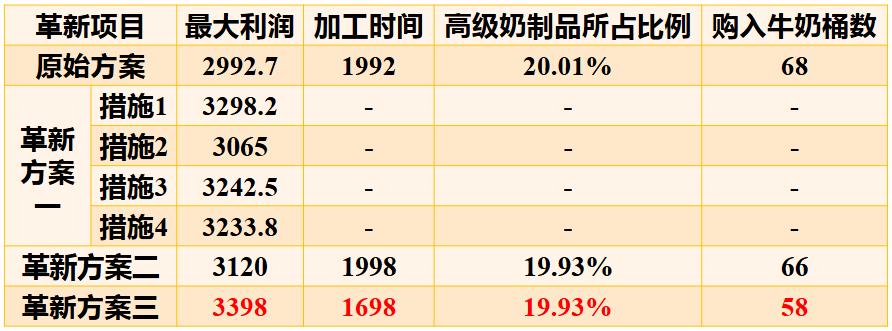